In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

Read the .csv files from the given directory. Jupyter notebook is already in the same directory as the dataset.

In [6]:
train = pd.read_csv("train.csv")
test = pd.read_csv("valid.csv")

Below shows the removal of empty columns and columns with empty values compared to the whole dataset.

In [7]:
train.drop(labels = ["id","member_id","grade","emp_title","issue_d","pymnt_plan","url","desc","title","mths_since_last_record",
                      "out_prncp","out_prncp_inv","total_rec_late_fee","recoveries","collection_recovery_fee","next_pymnt_d",
                      "last_credit_pull_d","mths_since_last_major_derog","policy_code","annual_inc_joint","dti_joint",
                      "verification_status_joint","acc_now_delinq","tot_coll_amt","open_acc_6m","open_act_il","open_il_12m",
                      "open_il_24m","mths_since_rcnt_il","total_bal_il","il_util","open_rv_12m","open_rv_24m","max_bal_bc",
                      "all_util","inq_fi","total_cu_tl","inq_last_12m","chargeoff_within_12_mths","delinq_amnt","mths_since_recent_bc_dlq",
                      "mths_since_recent_revol_delinq","num_tl_120dpd_2m","num_tl_30dpd","num_tl_90g_dpd_24m","revol_bal_joint",
                      "sec_app_earliest_cr_line","sec_app_inq_last_6mths","sec_app_mort_acc","sec_app_open_acc","sec_app_revol_util",
                      "sec_app_open_act_il","sec_app_num_rev_accts","sec_app_chargeoff_within_12_mths","sec_app_collections_12_mths_ex_med",
                      "sec_app_mths_since_last_major_derog","hardship_flag","hardship_type","hardship_reason","hardship_status",
                      "deferral_term","hardship_amount","hardship_start_date","hardship_end_date","payment_plan_start_date","hardship_length",
                      "hardship_dpd","hardship_loan_status","orig_projected_additional_accrued_interest","hardship_payoff_balance_amount",
                      "hardship_last_payment_amount","disbursement_method","debt_settlement_flag_date","settlement_status","settlement_date",
                      "settlement_amount","settlement_percentage","settlement_term"], axis = 1,inplace = True)

In [8]:
test.drop(labels = ["id","member_id","grade","emp_title","issue_d","pymnt_plan","url","desc","title","mths_since_last_record",
                      "out_prncp","out_prncp_inv","total_rec_late_fee","recoveries","collection_recovery_fee","next_pymnt_d",
                      "last_credit_pull_d","mths_since_last_major_derog","policy_code","annual_inc_joint","dti_joint",
                      "verification_status_joint","acc_now_delinq","tot_coll_amt","open_acc_6m","open_act_il","open_il_12m",
                      "open_il_24m","mths_since_rcnt_il","total_bal_il","il_util","open_rv_12m","open_rv_24m","max_bal_bc",
                      "all_util","inq_fi","total_cu_tl","inq_last_12m","chargeoff_within_12_mths","delinq_amnt","mths_since_recent_bc_dlq",
                      "mths_since_recent_revol_delinq","num_tl_120dpd_2m","num_tl_30dpd","num_tl_90g_dpd_24m","revol_bal_joint",
                      "sec_app_earliest_cr_line","sec_app_inq_last_6mths","sec_app_mort_acc","sec_app_open_acc","sec_app_revol_util",
                      "sec_app_open_act_il","sec_app_num_rev_accts","sec_app_chargeoff_within_12_mths","sec_app_collections_12_mths_ex_med",
                      "sec_app_mths_since_last_major_derog","hardship_flag","hardship_type","hardship_reason","hardship_status",
                      "deferral_term","hardship_amount","hardship_start_date","hardship_end_date","payment_plan_start_date","hardship_length",
                      "hardship_dpd","hardship_loan_status","orig_projected_additional_accrued_interest","hardship_payoff_balance_amount",
                      "hardship_last_payment_amount","disbursement_method","debt_settlement_flag_date","settlement_status","settlement_date",
                      "settlement_amount","settlement_percentage","settlement_term"], axis = 1,inplace = True)

In [9]:
train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,loan_status
0,14000,14000,14000.0,36 months,7.35,434.53,A4,1 year,MORTGAGE,44000.0,...,100.0,0.0,0.0,1.0,67943.0,23659.0,13600.0,48043.0,N,1
1,2000,2000,2000.0,36 months,16.29,70.61,D2,NaN,MORTGAGE,11420.0,...,93.7,100.0,1.0,0.0,9800.0,4168.0,1300.0,0.0,N,1
2,5000,5000,4750.0,36 months,7.39,155.28,A4,4 years,MORTGAGE,65000.0,...,100.0,0.0,0.0,0.0,237800.0,20061.0,64200.0,21600.0,N,1
3,20600,20600,20600.0,36 months,11.99,684.12,B5,NaN,MORTGAGE,46956.0,...,91.2,50.0,0.0,0.0,105100.0,12355.0,15300.0,0.0,N,1
4,10000,10000,10000.0,36 months,7.39,310.56,A4,< 1 year,MORTGAGE,115000.0,...,97.0,25.0,0.0,1.0,135735.0,141874.0,12000.0,123535.0,N,1


In [10]:
X = train.drop(columns=['loan_status'])             # Initialize x axes for train csv file
X_valid = test.drop(columns=['loan_status'])        # Initialize x axes for valid csv file

y = train['loan_status']                            # Initialize y axis for train csv file
y_valid = test['loan_status']                       # Initialize y axis for valid csv file

Throughout the notebook I have taken into account dataset.head() for many reasons.
One of the main reason being understanding the dataset and quick access to labels.

In [11]:
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag
0,14000,14000,14000.0,36 months,7.35,434.53,A4,1 year,MORTGAGE,44000.0,...,1.0,100.0,0.0,0.0,1.0,67943.0,23659.0,13600.0,48043.0,N
1,2000,2000,2000.0,36 months,16.29,70.61,D2,NaN,MORTGAGE,11420.0,...,4.0,93.7,100.0,1.0,0.0,9800.0,4168.0,1300.0,0.0,N
2,5000,5000,4750.0,36 months,7.39,155.28,A4,4 years,MORTGAGE,65000.0,...,2.0,100.0,0.0,0.0,0.0,237800.0,20061.0,64200.0,21600.0,N
3,20600,20600,20600.0,36 months,11.99,684.12,B5,NaN,MORTGAGE,46956.0,...,0.0,91.2,50.0,0.0,0.0,105100.0,12355.0,15300.0,0.0,N
4,10000,10000,10000.0,36 months,7.39,310.56,A4,< 1 year,MORTGAGE,115000.0,...,1.0,97.0,25.0,0.0,1.0,135735.0,141874.0,12000.0,123535.0,N


It became easier to seperate objects and numerical values, so that it is easier for me to encode objects seperately and not worry about numerical values.

In [12]:
# Seperation of numerical values from object values for easier encoding purposes.
numeric_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In order get an idea on how the object values are, I have taken the unique values to display such that it is easier to understand which label to encode with which method.

In [13]:
for column in categorical_cols:
    print(X[column].unique())

[' 36 months' ' 60 months']
['A4' 'D2' 'B5' 'C4' 'C1' 'B2' 'A5' 'E1' 'C5' 'A3' 'D5' 'E3' 'B1' 'C3'
 'B3' 'D3' 'B4' 'D4' 'C2' 'A1' 'F4' 'D1' 'A2' 'F1' 'E2' 'G4' 'E4' 'F2'
 'F3' 'G2' 'G5' 'F5' 'E5' 'G1' 'G3']
['1 year' nan '4 years' '< 1 year' '5 years' '10+ years' '2 years'
 '7 years' '9 years' '3 years' '8 years' '6 years']
['MORTGAGE' 'RENT' 'OWN' 'ANY' 'OTHER' 'NONE']
['Not Verified' 'Verified' 'Source Verified']
['debt_consolidation' 'credit_card' 'home_improvement' 'other' 'car'
 'vacation' 'small_business' 'moving' 'house' 'medical' 'major_purchase'
 'renewable_energy' 'wedding' 'educational']
['740xx' '337xx' '786xx' '780xx' '191xx' '080xx' '800xx' '390xx' '054xx'
 '840xx' '210xx' '301xx' '928xx' '112xx' '300xx' '105xx' '104xx' '906xx'
 '314xx' '016xx' '103xx' '087xx' '917xx' '761xx' '178xx' '618xx' '546xx'
 '331xx' '074xx' '980xx' '782xx' '606xx' '541xx' '750xx' '853xx' '605xx'
 '939xx' '852xx' '027xx' '456xx' '923xx' '775xx' '238xx' '973xx' '934xx'
 '745xx' '219xx' '975xx' '217

After going through each of the unique values above. I came to conclusion that some of the values need to be encoded using functions instead of normal encoding methods.
Therefore I have taken action to create functions in such cases.

In [14]:
import math

# This is a function to get only the numerical part from a string of letters and numbers
def term_to_value(term):
    return int(term.split()[0])
    
# This is a function to encode the string with a letter and a number to a summation of the number and the ascii value of the number
def grade_to_int(term):
    letter_part = term[0]
    number_part = int(term[1])
    letter_value = ord(letter_part) - ord('A') + 1
    encoded_value = (letter_value - 1)*5 + number_part
    return encoded_value

# This is a function to get only the numerical part of a string
def convert_to_int(value):
    if isinstance(value, str):
        numeric_part = ''.join(filter(str.isdigit, value))
        return int(numeric_part)
    else:
        return None

# This is a function to encode the employee work experience into a ordinal value
def length_to_ordinal(emp_length):
    if isinstance(emp_length, str):
        ordinal_mapping = {'< 1 year': 0,
                           '1 year': 1,
                           '2 years': 2,
                           '3 years': 3,
                           '4 years': 4,
                           '5 years': 5,
                           '6 years': 6,
                           '7 years': 7,
                           '8 years': 8,
                           '9 years': 9,
                           '10+ years': 10}
        return ordinal_mapping.get(emp_length, None)
    else:
        return None
    

After completely finishing above functions, it is time to apply them and update the two datasets. "train" dataset and "valid" dataset

In [15]:
X["term"] = X["term"].apply(term_to_value)
X_valid["term"] = X_valid["term"].apply(term_to_value)

X["sub_grade"] = X["sub_grade"].apply(grade_to_int)
X_valid["sub_grade"] = X_valid["sub_grade"].apply(grade_to_int)

X["zip_code"] = X["zip_code"].apply(convert_to_int)
X_valid["zip_code"] = X_valid["zip_code"].apply(convert_to_int)

X["emp_length"] = X["emp_length"].apply(length_to_ordinal)
X_valid["emp_length"] = X_valid["emp_length"].apply(length_to_ordinal)

In [16]:
from sklearn.preprocessing import LabelEncoder
# For encoding purposes, initialization of LabelEncoder for putting to use later.
encoder = LabelEncoder()

Using the initialized LabelEncoder it is better to encode some of the selected objects using such encoder.
Selected labels have been encoded using the LabelEncoder below.

In [17]:
X['home_ownership'] = encoder.fit_transform(X['home_ownership'])
X_valid['home_ownership'] = encoder.fit_transform(X_valid['home_ownership'])

X['verification_status'] = encoder.fit_transform(X['verification_status'])
X_valid['verification_status'] = encoder.fit_transform(X_valid['verification_status'])

X['initial_list_status'] = encoder.fit_transform(X['initial_list_status'])
X_valid['initial_list_status'] = encoder.fit_transform(X_valid['initial_list_status'])

X['application_type'] = encoder.fit_transform(X['application_type'])
X_valid['application_type'] = encoder.fit_transform(X_valid['application_type'])

X['debt_settlement_flag'] = encoder.fit_transform(X['debt_settlement_flag'])
X_valid['debt_settlement_flag'] = encoder.fit_transform(X_valid['debt_settlement_flag'])


To better understand the correlation between each label, I have used a correlation matrix. 
This is an easier method to understand whether each label is linearly dependant or independant.

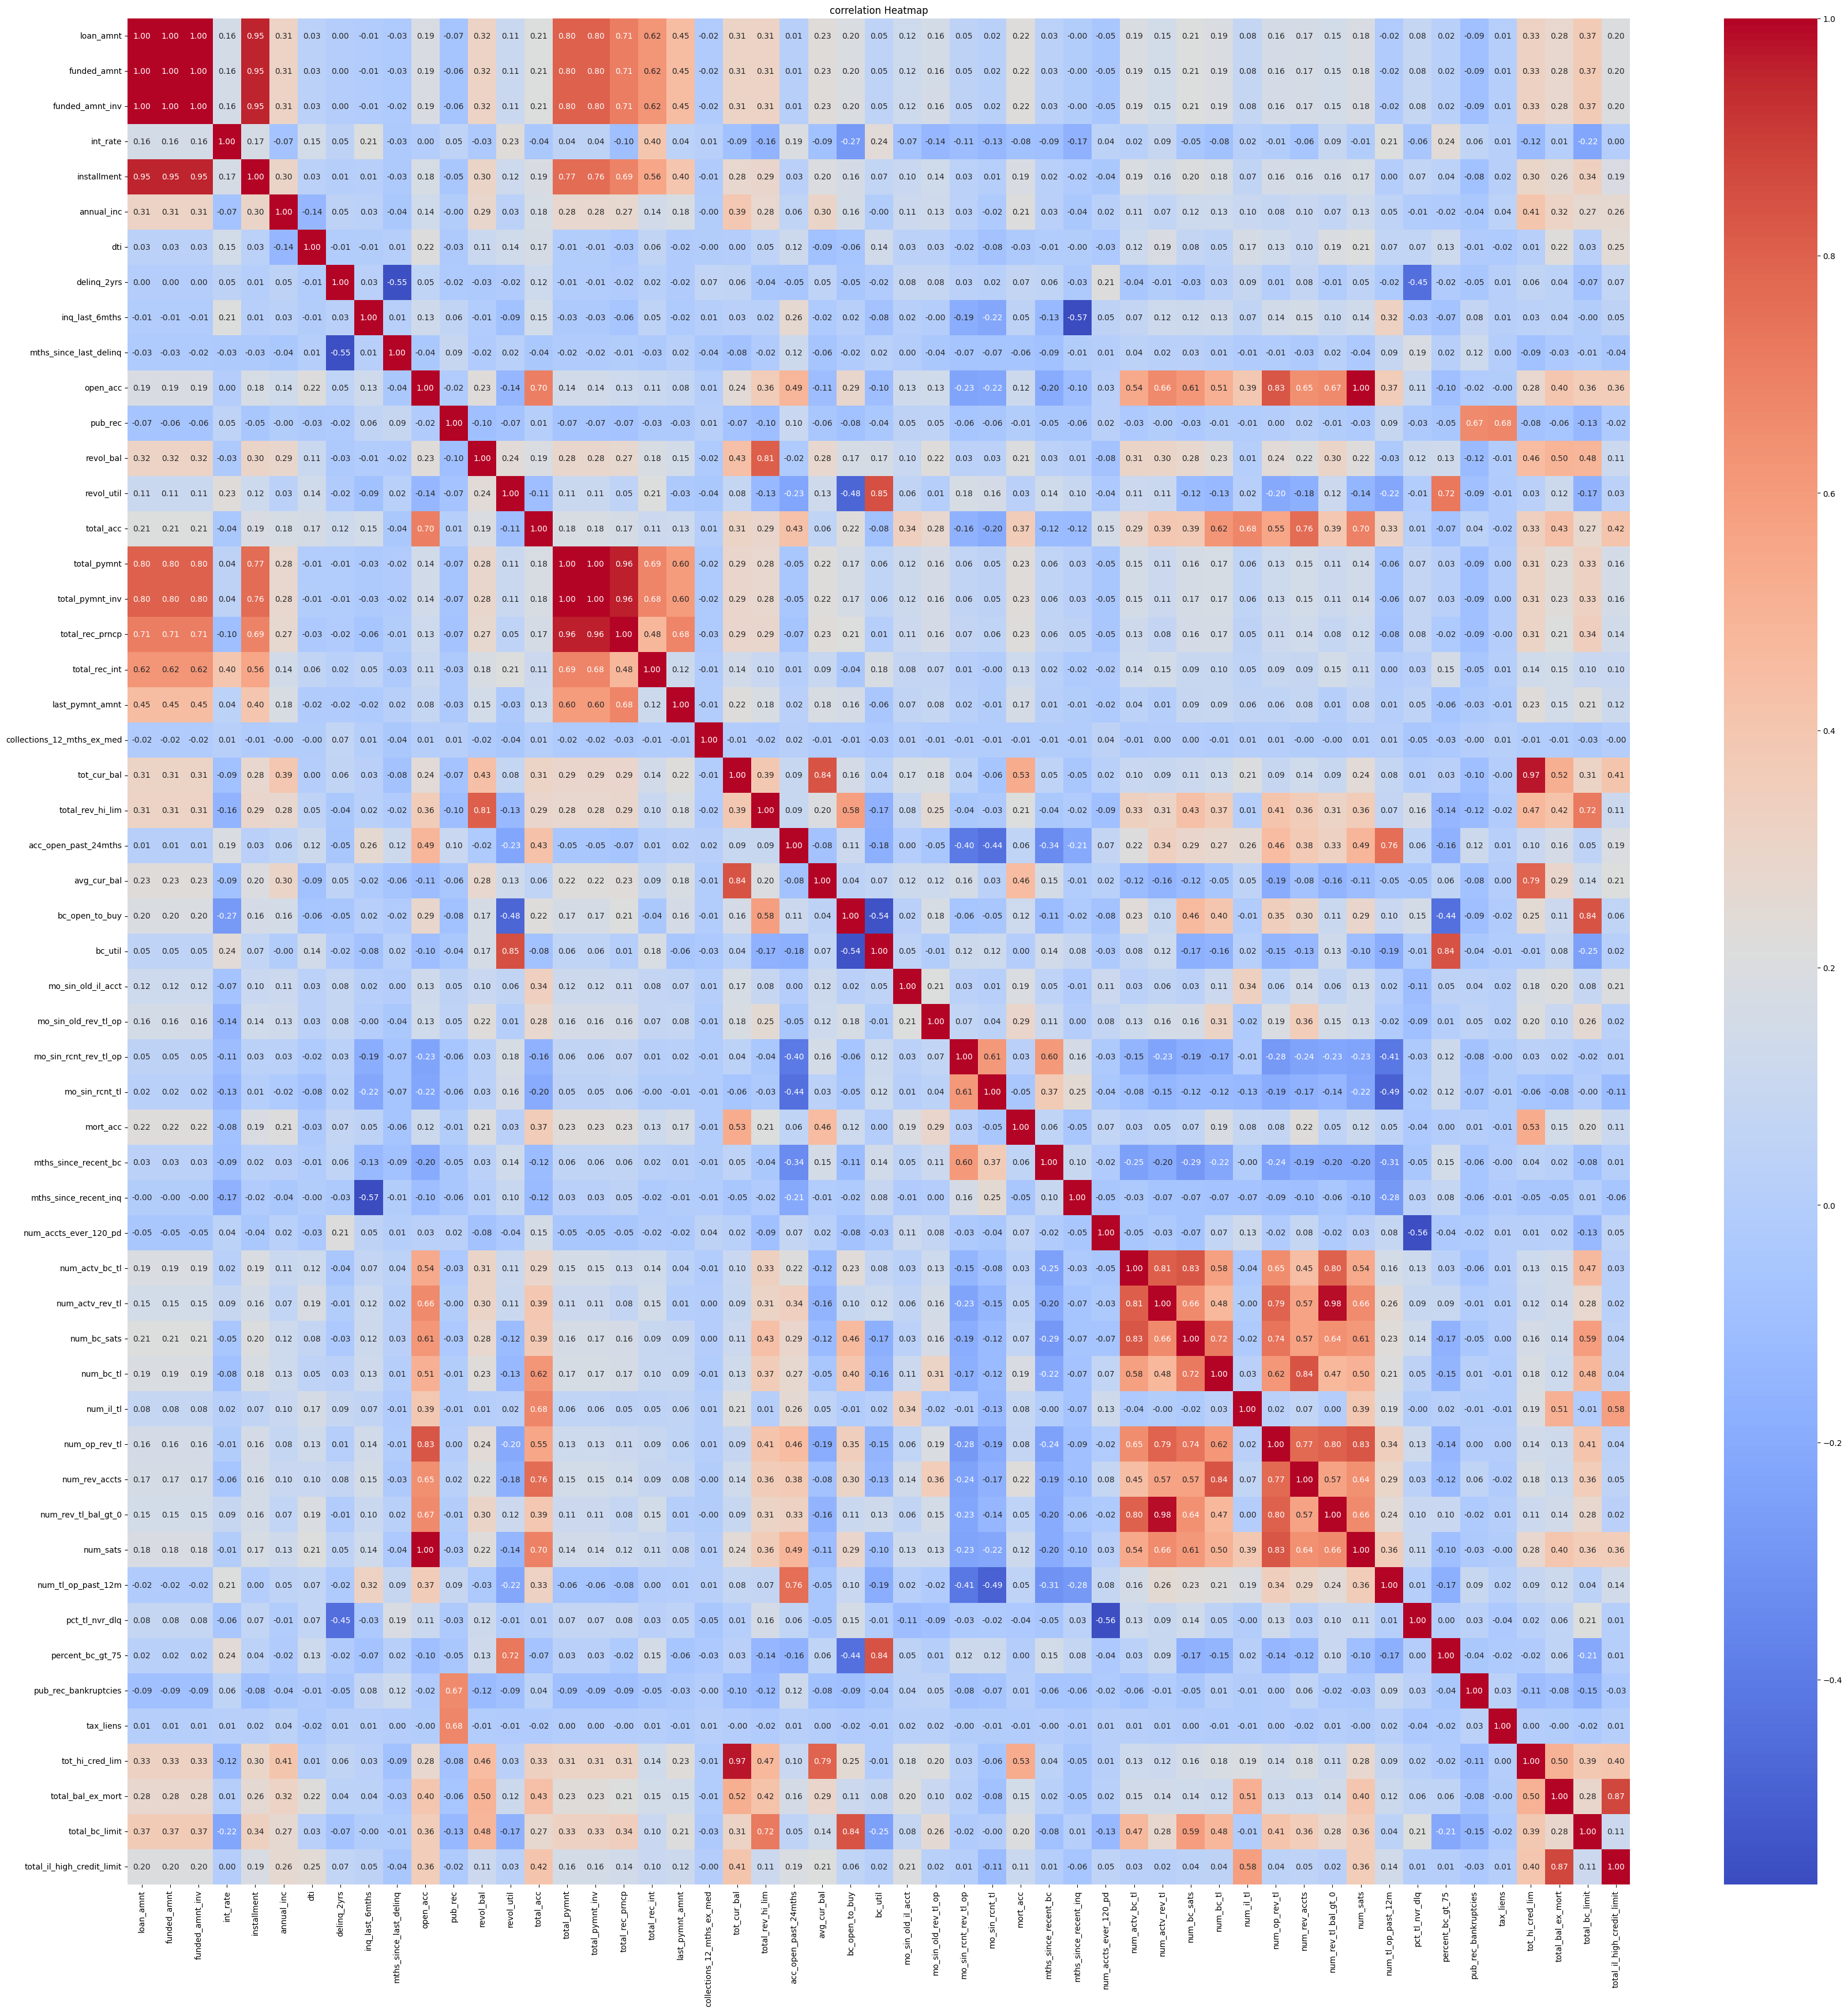

In [18]:
correlation_matrix = X[numeric_cols].corr()
plt.figure(figsize=(42,42))
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm',fmt=".2f")
plt.title("correlation Heatmap")
plt.show()

By visualizing the correlation matrix it is easier for us to see that some of the features are almost linearly dependant. 
Therefore it is best to drop one of the linearly dependant features to reduce the dimensions of the dataset.

In [19]:
# Need to drop ["tot_hi_cred_lim","percentc_bc_get_75","num_sats","num_rev_tl_bal_gt_0","total_rec_prncp","total_pymnt_inv","installment","funded_amnt_inv","funded_amnt"]
X.drop(labels=["tot_hi_cred_lim","percent_bc_gt_75","num_sats","num_rev_tl_bal_gt_0","total_rec_prncp","total_pymnt_inv","installment",
                   "funded_amnt_inv","funded_amnt"],axis=1,inplace=True)

# Same has done for the "valid" dataset
X_valid.drop(labels=["tot_hi_cred_lim","percent_bc_gt_75","num_sats","num_rev_tl_bal_gt_0","total_rec_prncp","total_pymnt_inv","installment",
                   "funded_amnt_inv","funded_amnt"],axis=1,inplace=True)

Using one hot encoding, some of the categorical values have been encoded for easier visualization and for the model to easily understand trends.

In [20]:
# Encoding train and valid files with one hot encoding method.
X= pd.get_dummies(X, columns = ["purpose"],prefix = '', prefix_sep = '')
X_valid = pd.get_dummies(X_valid, columns = ["purpose"],prefix = '', prefix_sep = '')

In [21]:
X["addr_state"].unique()

array(['OK', 'FL', 'TX', 'PA', 'NJ', 'CO', 'MS', 'VT', 'UT', 'MD', 'GA',
       'CA', 'NY', 'MA', 'IL', 'WI', 'WA', 'AZ', 'OH', 'VA', 'OR', 'MO',
       'MI', 'CT', 'SC', 'LA', 'TN', 'IN', 'NC', 'NM', 'AL', 'KS', 'WV',
       'HI', 'MN', 'NE', 'NH', 'DE', 'AR', 'DC', 'WY', 'NV', 'KY', 'RI',
       'AK', 'SD', 'MT', 'ND', 'ID', 'ME', 'IA'], dtype=object)

In [22]:
# This is a function to get the date of a label and seperate the year and month into two columns
def encode_date_to_numeric(df, date_column):
    df[date_column] = pd.to_datetime(df[date_column], format = '%b-%Y')
    
    df[date_column+'_year'] = df[date_column].dt.year
    df[date_column+'_month'] = df[date_column].dt.month
    
    return df

Using the above function encoding of date values has been done and the older object label has been dropped.

In [23]:
X = encode_date_to_numeric(X, 'earliest_cr_line')
X_valid = encode_date_to_numeric(X_valid, 'earliest_cr_line')

X = encode_date_to_numeric(X, 'last_pymnt_d')
X_valid = encode_date_to_numeric(X_valid, 'last_pymnt_d')

In [24]:
X.drop(labels=['earliest_cr_line','last_pymnt_d'],axis=1,inplace=True)
X_valid.drop(labels=['earliest_cr_line','last_pymnt_d'],axis=1,inplace=True)

After checking the "addr_state" label, it is better to use one hot encoding to encode this into boolean data.

In [25]:
X = pd.get_dummies(X, columns = ["addr_state"],prefix = '', prefix_sep = '')
X_valid = pd.get_dummies(X_valid, columns = ["addr_state"],prefix = '', prefix_sep = '')

In [26]:
numeric_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [27]:
X[numeric_cols].head()

,loan_amnt,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,zip_code,dti,...,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,earliest_cr_line_year,earliest_cr_line_month,last_pymnt_d_year,last_pymnt_d_month
0,14000,36,7.35,4,1.0,1,44000.0,0,740.0,34.70,...,0.0,1.0,23659.0,13600.0,48043.0,0,2003,2,2018.0,12.0
1,2000,36,16.29,17,NaN,1,11420.0,2,337.0,20.61,...,1.0,0.0,4168.0,1300.0,0.0,0,1982,3,2017.0,7.0
2,5000,36,7.39,4,4.0,1,65000.0,0,786.0,11.04,...,0.0,0.0,20061.0,64200.0,21600.0,0,1997,7,2017.0,10.0
3,20600,36,11.99,10,NaN,1,46956.0,1,780.0,24.43,...,0.0,0.0,12355.0,15300.0,0.0,0,1998,4,2018.0,1.0
4,10000,36,7.39,4,0.0,1,115000.0,1,191.0,17.94,...,0.0,1.0,141874.0,12000.0,123535.0,0,2001,1,2017.0,12.0


In [28]:
X.head()

,loan_amnt,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,zip_code,dti,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,14000,36,7.35,4,1.0,1,44000.0,0,740.0,34.70,...,False,False,False,False,False,False,False,False,False,False
1,2000,36,16.29,17,NaN,1,11420.0,2,337.0,20.61,...,False,False,False,False,False,False,False,False,False,False
2,5000,36,7.39,4,4.0,1,65000.0,0,786.0,11.04,...,False,False,True,False,False,False,False,False,False,False
3,20600,36,11.99,10,NaN,1,46956.0,1,780.0,24.43,...,False,False,True,False,False,False,False,False,False,False
4,10000,36,7.39,4,0.0,1,115000.0,1,191.0,17.94,...,False,False,False,False,False,False,False,False,False,False


In [29]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: loan_status, dtype: int64

For further dimension reduction, I have imported SelectKBest to select the K best features that affects y the most.

In [30]:
# Importing relevant models for further dimension reduction and calculations
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score

Using SimpleImputer, I have imputed missing values in the dataset with their corresponding mean values.
This seemed to me like the best case to do so.

In [31]:
imputer = SimpleImputer(strategy='mean')

# Using SimpleImputer imputing missing values with their corresponding mean values for each label

X_imputed = imputer.fit_transform(X)
X_valid_imputed = imputer.fit_transform(X_valid)

To make all the labels have a positive value in order to train the model, I have used MinMaxScaler to create a non negative dataset from the encoded and imputed dataset.

In [32]:
X_shifted = X_imputed - np.min(X_imputed) + 1                           # Shift to make all values positive
X_valid_shifted = X_valid_imputed - np.min(X_valid_imputed) + 1

scaler = MinMaxScaler()

X_non_negative = scaler.fit_transform(X_shifted)
X_valid_non_negative = scaler.fit_transform(X_valid_shifted)

After doing all the cleaning, preprocessing, feature engineering steps, now it is time for training the model.
Before that, I have used SelectKBest algorithm to select the K best features from the encoded dataset.
This is done due to the fact that it is easier for the model to predict, and for making the model training faster and efficient.

In [33]:
k_best = SelectKBest(score_func=chi2, k = 18)
# After going through a number of cycles it has come to conclusion that k = 18 gives the best accuracy

X_selected = k_best.fit_transform(X_non_negative,y)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=0)

After splitting the selected datset, I started to initialize the XGBClassifier model.

In [35]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [36]:
import shap

In [37]:
# Initialize an explainer object with the model and training data
explainer = shap.Explainer(model, X_train)

# Generate SHAP values for the prepared data
shap_values = explainer.shap_values(X_test)

100%|===================| 103426/103558 [04:52<00:00]        

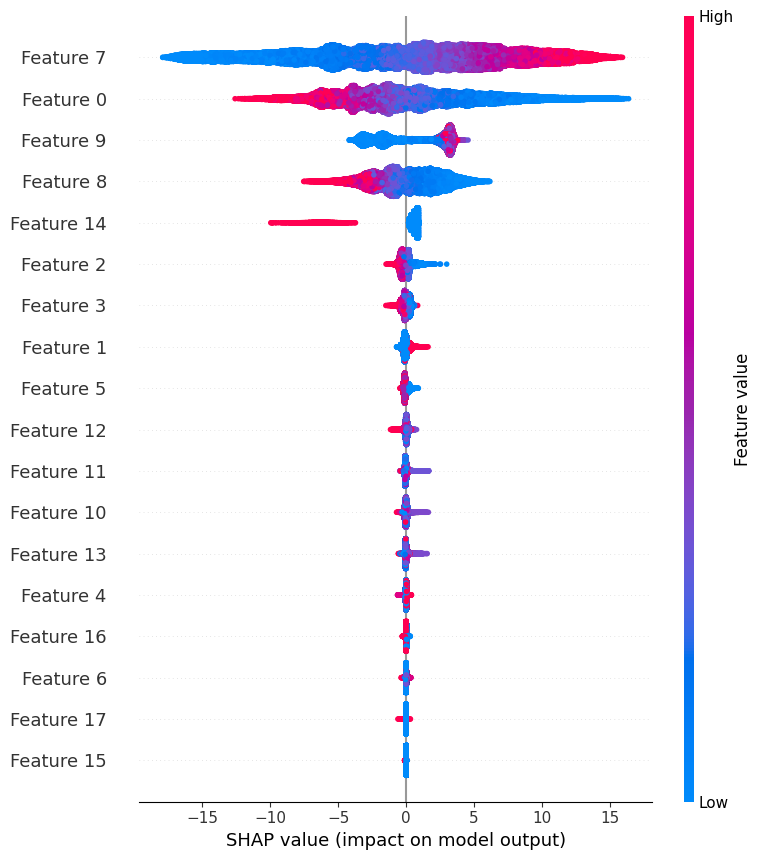

In [55]:
shap.summary_plot(shap_values, X_test)

This point onwards is fitting the model into the dataset and getting predictions as well as accuracy scores in order to evaluate the training model.
To evaluate and get a higher accuracy score I have changed the selected features in the SelectKBest model.

In [38]:
y_pred = model.predict(X_test)

In [39]:
X_valid_selected = k_best.transform(X_valid_non_negative)

In [40]:
y_pred_valid = model.predict(X_valid_selected)

In [41]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9955580447671836


In [42]:
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print(accuracy_valid)

0.9949129759669981


From this point onwards, the same preprocessing methods and encoding methods are applied to "X_test.csv" to get the "loan_status" predictions from the trained predictive model.

In [43]:
model_test = pd.read_csv('X_test.csv')
X_model_test_encoded = model_test.copy()

In [44]:
X_model_test_encoded.drop(labels = ["id","member_id","grade","emp_title","issue_d","pymnt_plan","url","desc","title","mths_since_last_record",
                      "out_prncp","out_prncp_inv","total_rec_late_fee","recoveries","collection_recovery_fee","next_pymnt_d",
                      "last_credit_pull_d","mths_since_last_major_derog","policy_code","annual_inc_joint","dti_joint",
                      "verification_status_joint","acc_now_delinq","tot_coll_amt","open_acc_6m","open_act_il","open_il_12m",
                      "open_il_24m","mths_since_rcnt_il","total_bal_il","il_util","open_rv_12m","open_rv_24m","max_bal_bc",
                      "all_util","inq_fi","total_cu_tl","inq_last_12m","chargeoff_within_12_mths","delinq_amnt","mths_since_recent_bc_dlq",
                      "mths_since_recent_revol_delinq","num_tl_120dpd_2m","num_tl_30dpd","num_tl_90g_dpd_24m","revol_bal_joint",
                      "sec_app_earliest_cr_line","sec_app_inq_last_6mths","sec_app_mort_acc","sec_app_open_acc","sec_app_revol_util",
                      "sec_app_open_act_il","sec_app_num_rev_accts","sec_app_chargeoff_within_12_mths","sec_app_collections_12_mths_ex_med",
                      "sec_app_mths_since_last_major_derog","hardship_flag","hardship_type","hardship_reason","hardship_status",
                      "deferral_term","hardship_amount","hardship_start_date","hardship_end_date","payment_plan_start_date","hardship_length",
                      "hardship_dpd","hardship_loan_status","orig_projected_additional_accrued_interest","hardship_payoff_balance_amount",
                      "hardship_last_payment_amount","disbursement_method","debt_settlement_flag_date","settlement_status","settlement_date",
                      "settlement_amount","settlement_percentage","settlement_term"], axis = 1,inplace = True)

In [45]:
X_model_test_encoded["term"] = model_test["term"].apply(term_to_value)
X_model_test_encoded["sub_grade"] = X_model_test_encoded["sub_grade"].apply(grade_to_int)
X_model_test_encoded["zip_code"] = X_model_test_encoded["zip_code"].apply(convert_to_int)
X_model_test_encoded["emp_length"] = X_model_test_encoded["emp_length"].apply(length_to_ordinal)
X_model_test_encoded['home_ownership'] = encoder.fit_transform(X_model_test_encoded['home_ownership'])
X_model_test_encoded['verification_status'] = encoder.fit_transform(X_model_test_encoded['verification_status'])
X_model_test_encoded['initial_list_status'] = encoder.fit_transform(X_model_test_encoded['initial_list_status'])
X_model_test_encoded['application_type'] = encoder.fit_transform(X_model_test_encoded['application_type'])
X_model_test_encoded['debt_settlement_flag'] = encoder.fit_transform(X_model_test_encoded['debt_settlement_flag'])

In [46]:
X_model_test_encoded.drop(labels=["tot_hi_cred_lim","percent_bc_gt_75","num_sats","num_rev_tl_bal_gt_0","total_rec_prncp","total_pymnt_inv","installment",
                   "funded_amnt_inv","funded_amnt"],axis=1,inplace=True)

In [47]:
X_model_test_encoded = pd.get_dummies(X_model_test_encoded, columns = ["purpose"],prefix = '', prefix_sep = '')
X_model_test_encoded = encode_date_to_numeric(X_model_test_encoded, 'earliest_cr_line')
X_model_test_encoded = encode_date_to_numeric(X_model_test_encoded, 'last_pymnt_d')
X_model_test_encoded.drop(labels=['earliest_cr_line','last_pymnt_d'],axis=1,inplace=True)
X_model_test_encoded = pd.get_dummies(X_model_test_encoded, columns = ["addr_state"],prefix = '', prefix_sep = '')

In [48]:
X_test_imputed = imputer.fit_transform(X_model_test_encoded)
X_test_shifted = X_test_imputed - np.min(X_test_imputed) + 1
X_test_non_negative = scaler.fit_transform(X_test_shifted)

In [49]:
X_test_selected = k_best.transform(X_test_non_negative)

In [50]:
y_test_pred = model.predict(X_test_selected)

In [51]:
selected_features = k_best.get_support()
selected_columns = X_model_test_encoded.columns[selected_features]
selected_data = X_model_test_encoded[selected_columns]

In [52]:
selected_data.loc[:,'loan_status'] = y_test_pred
selected_data.head()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,loan_amnt,term,int_rate,sub_grade,home_ownership,verification_status,inq_last_6mths,total_pymnt,total_rec_int,last_pymnt_amnt,acc_open_past_24mths,mort_acc,mths_since_recent_inq,num_tl_op_past_12m,debt_settlement_flag,credit_card,debt_consolidation,small_business,loan_status
0,8100,36,11.47,10,5,1,2.0,8146.460000,46.46,8151.62,2.0,0.0,0.0,1.0,0,False,True,False,1
1,10000,36,12.99,12,4,1,2.0,1966.540000,310.08,336.90,3.0,0.0,2.0,1.0,0,False,False,True,0
2,9450,36,13.67,10,1,2,1.0,10328.803125,878.80,7757.04,6.0,5.0,3.0,2.0,0,False,True,False,1
3,25000,36,17.49,20,1,2,0.0,32307.326877,7307.33,946.48,NaN,NaN,NaN,NaN,0,False,True,False,1
4,16000,60,14.99,15,1,2,1.0,12368.960000,4754.46,380.56,7.0,4.0,1.0,4.0,0,False,True,False,0


In [53]:
last_column = selected_data.columns[-1]

selected_data_new = pd.concat([selected_data[last_column], selected_data.drop(columns=[last_column])],axis=1)

selected_data_new.head()

,loan_status,loan_amnt,term,int_rate,sub_grade,home_ownership,verification_status,inq_last_6mths,total_pymnt,total_rec_int,last_pymnt_amnt,acc_open_past_24mths,mort_acc,mths_since_recent_inq,num_tl_op_past_12m,debt_settlement_flag,credit_card,debt_consolidation,small_business
0,1,8100,36,11.47,10,5,1,2.0,8146.460000,46.46,8151.62,2.0,0.0,0.0,1.0,0,False,True,False
1,0,10000,36,12.99,12,4,1,2.0,1966.540000,310.08,336.90,3.0,0.0,2.0,1.0,0,False,False,True
2,1,9450,36,13.67,10,1,2,1.0,10328.803125,878.80,7757.04,6.0,5.0,3.0,2.0,0,False,True,False
3,1,25000,36,17.49,20,1,2,0.0,32307.326877,7307.33,946.48,NaN,NaN,NaN,NaN,0,False,True,False
4,0,16000,60,14.99,15,1,2,1.0,12368.960000,4754.46,380.56,7.0,4.0,1.0,4.0,0,False,True,False


In [54]:
selected_data_new.to_csv('210242F.csv', index=False)        # Creation of a new dataset and exporting it to a .csv file to finalize the lab session